<a href="https://colab.research.google.com/github/Charan6924/MachineLearningProjects/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Classification

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784',as_frame = False)
X,y = mnist.data, mnist.target

In [3]:
X_train, X_test = X[:60000],X[60000:]
y_train, y_test = y[:60000],y[60000:]

In [4]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [5]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state = 42)
sgd.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [6]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd,X_train,y_train_5,cv=3,scoring = 'accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [7]:
from sklearn.dummy import DummyClassifier

d = DummyClassifier()
d.fit(X_train,y_train_5)
cross_val_score(d,X_train,y_train_5,cv = 3, scoring = 'accuracy')

array([0.90965, 0.90965, 0.90965])

In [8]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_pred = cross_val_predict(sgd,X_train,y_train_5,cv = 3)
cm = confusion_matrix(y_train_5,y_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [9]:
from sklearn.metrics import precision_score,recall_score, f1_score
x = precision_score(y_train_5,y_pred)
y = recall_score(y_train_5,y_pred)
z = f1_score(y_train_5,y_pred)
print(x)
print(y)
print(z)

0.8370879772350012
0.6511713705958311
0.7325171197343847


In [10]:
some_digit = X[0]
y_scores = sgd.decision_function([some_digit])
y_scores

array([2164.22030239])

In [11]:
y_scores = cross_val_predict(sgd,X_train,y_train_5,cv = 3, method = 'decision_function')

In [12]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(y_train_5,y_scores)

In [13]:
idx = (precisions>=0.90).argmax()
t = thresholds[idx]
t

np.float64(3370.0194991439557)

In [14]:
y_train_pred_90 = (y_scores >= t)

In [15]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [16]:
recall_at_90 = recall_score(y_train_5,y_train_pred_90)
recall_at_90

0.4799852425751706

In [17]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_train_5,y_scores)

In [18]:
idx = (thresholds <= t).argmax()
tpr_90,fpr_90 =tpr[idx],fpr[idx]

In [19]:
from sklearn.ensemble import RandomForestClassifier
f = RandomForestClassifier(random_state = 42)
y_probs = cross_val_predict(f,X_train,y_train_5,cv = 3, method = 'predict_proba')

In [20]:
y_scores = y_probs[:,1]
p,r,t = precision_recall_curve(y_train_5,y_scores)
p
r
t

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [21]:
y_train_pred_forest = y_probs[:,1] >= 0.5
f1_score(y_train_5,y_train_pred_forest)

0.9274509803921569

#Multiclass Classification

In [22]:
from sklearn.svm import SVC
svm_clf = SVC(random_state = 42)
svm_clf.fit(X_train[:2000],y_train[:2000])

SVC(random_state=42)

In [23]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [24]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [25]:
some_digit_scores.round(2).argmax()

np.int64(5)

In [26]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [27]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(random_state = 42))
ovr_clf.fit(X_train[:2000],y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [28]:
len(ovr_clf.estimators_)

10

In [29]:
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train,y_train)

SGDClassifier(random_state=42)

In [30]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

In [31]:
cross_val_score(sgd_clf,X_train,y_train,cv = 3,scoring = 'accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [ ]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X_train_scaled = s.fit_transform(X_train.astype('float64'))
cross_val_score(sgd_clf,X_train_scaled,y_train,cv = 3,scoring = 'accuracy')

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred = cross_val_predict(sgd_clf,X_train_scaled,y_train,cv = 3)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)
plt.show()

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,normalize = "true",values_format = ".0%")
plt.show()

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score, f1_score
from sklearn.model_selection import cross_val_score

kn = KNeighborsClassifier()
kn.fit(X_train,y_train)
cross_val_score(kn,X_train,y_train,cv = 3, scoring = 'accuracy')


KeyboardInterrupt: 

In [7]:
from sklearn.model_selection import GridSearchCV

grid = {
    "weights" : ['uniform','distance'],
    "n_neighbors" : [3,4,5,6]
}

g = GridSearchCV(kn,grid,cv = 5)
g.fit(X_train[:10_000],y_train[:10_000])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6],
                         'weights': ['uniform', 'distance']})

In [9]:
g.best_score_


np.float64(0.9441999999999998)

In [13]:
X_train[0].shape

(784,)

In [ ]:
height,width = 28,28
r = height - 1
shifted = np.zeros_like(X_train[0])
shifted[0:r] = X_train[0][1:height]

In [26]:
from scipy.ndimage import shift

def shift_img(img,dx,dy):
  img = img.reshape((28,28))
  shifted = shift(img,[dy,dx],cval = 0, mode = 'constant')
  return shifted.reshape([-1])

In [27]:
import matplotlib.pyplot as plt

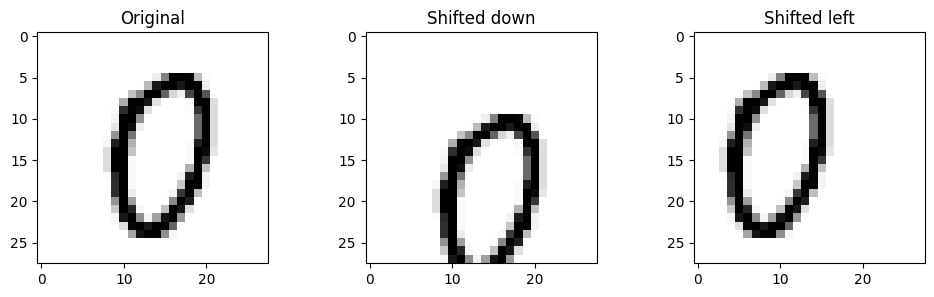

In [28]:
s = X_train[1000]
shifted_image_down = shift_img(s, 0, +5)
shifted_image_left = shift_img(s, -5, 0)

plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.title("Original")
plt.imshow(s.reshape(28, 28),
           interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down")
plt.imshow(shifted_image_down.reshape(28, 28),
           interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left")
plt.imshow(shifted_image_left.reshape(28, 28),
           interpolation="nearest", cmap="Greys")
plt.show()

In [ ]:
X_train_full = [i for i in X_train]
y_train_full = [i for i in y_train]

for i,j in [(0,1),(1,0),(0,-1),(-1,0)]:
  for img,lbl in zip(X_train_full,y_train_full):
    X_train_full.append(shift_img(img,i,j))
    y_train_full.append(lbl)


X_train_augmented = np.array(X_train_full)
y_train_augmented = np.array(y_train_full)
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [ ]:
knn = KNeighborsClassifier(**g.best_params_)
knn.fit(X_train_augmented,y_train_augmented)
knn.score(X_test,y_test)